In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
class Configs:
    ## Inputs
    filenames_training = [
        'training_data_original',
        'training_data_repaint',
        'training_data_rdkit',
        'training_data_randepict',
    ]
    ## Setting up training parameters, found after optimizing
    epochs = 100
    batch_size = 600
    buffer_size = 1000
    embedding_dim = 600
    units = 1024
    ## Here, we are using Inception V3 as base so the feature shape is set to 2048 and the attention shape is set to 64
    features_shape = 2048
    attention_features_shape = 64

In [4]:
frames = []
for filename in Configs.filenames_training:
    df = pd.read_csv(os.path.join('ckpt', f'history_{filename}.csv'))
    df['label'] = filename.split('_')[-1]
    frames.append(df)

In [5]:
df_merged = pd.concat(frames).reset_index().rename(columns={'index':'epoch'})

In [6]:
df_merged

,epoch,loss_training,score_validation,label
0,0,1.280049,0.0,original
1,1,0.685794,0.0,original
2,2,0.608453,0.0,original
3,3,0.568957,0.0,original
4,4,0.539069,0.0,original
...,...,...,...,...
795,195,0.014178,0.0,randepict
796,196,0.013649,0.0,randepict
797,197,0.014202,0.0,randepict
798,198,0.014881,0.0,randepict


<Axes: xlabel='epoch', ylabel='loss_training'>

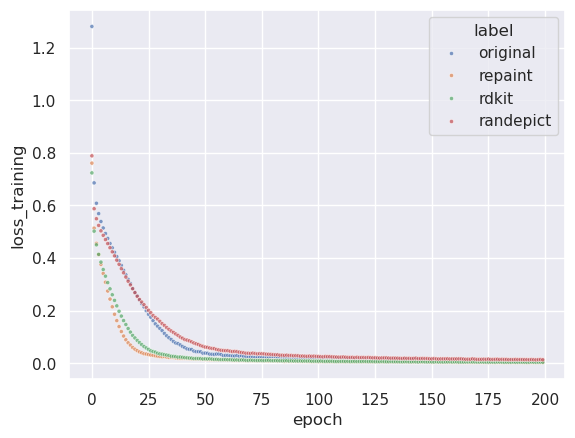

In [7]:
sns.scatterplot(data=df_merged, x='epoch', y='loss_training', hue='label', marker='.', alpha=0.7)